In [2]:
import pandas as pd
df1 = pd.DataFrame([[12,34,56],[24,34,10]],columns=["day1","day2","day3"])
df1

,day1,day2,day3
0,12,34,56
1,24,34,10


In [4]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df['SibSp'] = df['SibSp'].astype('float')
df['SibSp'].dtypes

dtype('float64')

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [15]:
# df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
Scaler = MinMaxScaler()
df['Fare']=Scaler.fit_transform(df[['Fare']])

<Axes: ylabel='Fare'>

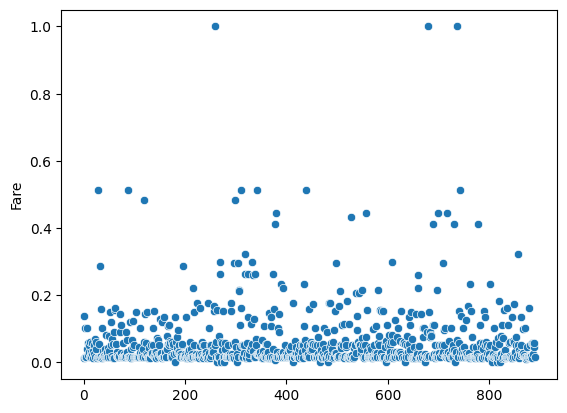

In [40]:
import seaborn as sns
sns.scatterplot(df.Fare)

In [34]:
# df['Sex'].replace(['male','female'],[0,1],inplace=True)
# df.Sex

In [41]:
# Encoder = LabelEncoder()
# df['Sex'] = Encoder.fit_transform(df['Sex'])
# df['Sex']

In [50]:
from sklearn.compose import ColumnTransformer
column=ColumnTransformer(transformers=[
    ('one',OneHotEncoder(drop='first'),['Sex'],)
],
 remainder='passthrough')

df_tran = column.fit_transform(df)
col = column.get_feature_names_out()
df2 = pd.DataFrame(df_tran,columns=col)
df2

,one__Sex_1,remainder__PassengerId,remainder__Survived,remainder__Pclass,remainder__Name,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Ticket,remainder__Fare,remainder__Cabin,remainder__Embarked
0,0.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1.0,0,A/5 21171,0.014151,NaN,S
1,1.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0,PC 17599,0.139136,C85,C
2,1.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0.0,0,STON/O2. 3101282,0.015469,NaN,S
3,1.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0,113803,0.103644,C123,S
4,0.0,5,0,3,"Allen, Mr. William Henry",35.0,0.0,0,373450,0.015713,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,887,0,2,"Montvila, Rev. Juozas",27.0,0.0,0,211536,0.025374,NaN,S
887,1.0,888,1,1,"Graham, Miss. Margaret Edith",19.0,0.0,0,112053,0.058556,B42,S
888,1.0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1.0,2,W./C. 6607,0.045771,NaN,S
889,0.0,890,1,1,"Behr, Mr. Karl Howell",26.0,0.0,0,111369,0.058556,C148,C


<strong>Assignment 2</storng>

In [99]:
dfass2 = pd.read_csv('Book1.csv')
dfass2

,Math Score,Reading Score,Writing Score,Placement Score,Club join year,Placement offer count
0,70,76.0,68.0,99,2022,3
1,65,65.0,69.0,85,2023,2
2,68,82.0,65.0,99,2018,3
3,90,76.0,68.0,82,2019,2
4,76,NaN,89.0,91,2019,3
5,61,83.0,70.0,90,2019,3
6,76,NaN,NaN,78,2022,1
7,74,84.0,69.0,98,2018,3
8,86,88.0,79.0,75,2019,1
9,90,77.0,NaN,99,2022,3


In [100]:
dfass2.isnull().sum()

Math Score               0
Reading Score            2
Writing Score            2
Placement Score          0
Club join year           0
Placement offer count    0
dtype: int64

In [101]:
df.dropna(axis=0,how='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1.0,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1.0,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0.0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1.0,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0.0,0,373450,0.015713,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0.0,0,211536,0.025374,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0.0,0,112053,0.058556,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1.0,2,W./C. 6607,0.045771,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0.0,0,111369,0.058556,C148,C


In [102]:
dfass2.isnull().sum()

Math Score               0
Reading Score            2
Writing Score            2
Placement Score          0
Club join year           0
Placement offer count    0
dtype: int64

In [103]:
dfass2.fillna(dfass2.mean(),inplace=True)
dfass2.isnull().sum()

Math Score               0
Reading Score            0
Writing Score            0
Placement Score          0
Club join year           0
Placement offer count    0
dtype: int64

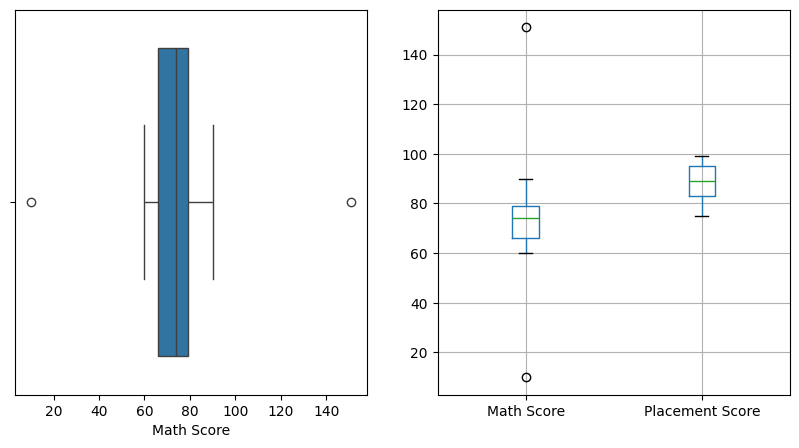

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=dfass2,x=dfass2['Math Score'])

col =['Math Score','Placement Score']
plt.subplot(1,2,2)
dfass2.boxplot(col)

plt.show()

In [115]:
q1 = dfass2['Math Score'].quantile(0.25)
q3 = dfass2['Math Score'].quantile(0.75)
iqr = q3-q1


lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
print(lower," ",upper)

63.5   83.5


In [106]:
dfass2.describe()

,Math Score,Reading Score,Writing Score,Placement Score,Club join year,Placement offer count
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,73.571429,76.042553,75.106383,88.510204,2020.163265,2.346939
std,16.759326,8.712915,8.639141,7.121337,1.760054,0.723159
min,10.000000,60.000000,60.000000,75.000000,2018.000000,1.000000
25%,66.000000,70.000000,69.000000,83.000000,2019.000000,2.000000
50%,74.000000,77.000000,76.000000,89.000000,2020.000000,2.000000
75%,79.000000,83.000000,81.000000,95.000000,2022.000000,3.000000
max,151.000000,90.000000,89.000000,99.000000,2023.000000,3.000000


In [113]:
dfass2=dfass2[(dfass2['Math Score']>lower) | (dfass2['Math Score']<upper)] 
dfass2

,Math Score,Reading Score,Writing Score,Placement Score,Club join year,Placement offer count
0,70,76.000000,68.000000,99,2022,3
2,68,82.000000,65.000000,99,2018,3
4,76,76.042553,89.000000,91,2019,3
6,76,76.042553,75.106383,78,2022,1
7,74,84.000000,69.000000,98,2018,3
11,76,87.000000,78.000000,83,2023,2
12,78,84.000000,77.000000,90,2021,3
15,76,77.000000,74.000000,93,2021,3
17,70,70.000000,72.000000,78,2022,1
18,78,72.000000,78.000000,83,2019,2


<Axes: >

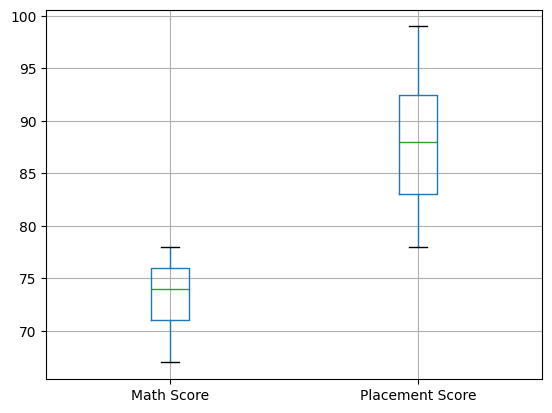

In [114]:
col =['Math Score','Placement Score']
dfass2.boxplot(col)

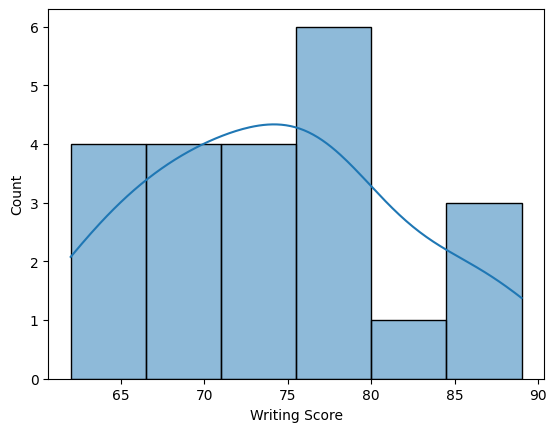

In [127]:
sns.histplot(dfass2['Writing Score'], kde=True)
import numpy as np

<Axes: xlabel='Writing Score', ylabel='Count'>

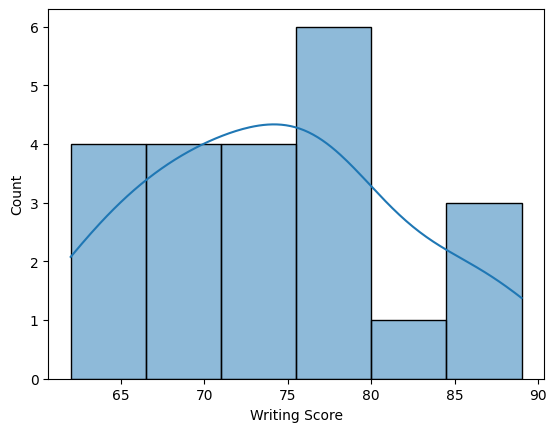

In [126]:
df['Writing Score']=np.log(dfass2['Writing Score'])
sns.histplot(dfass2['Writing Score'], kde=True)

<b>ASSIGNMENT 3</b>

In [135]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Age_Group': ['18','18','26','36','46', '26', '36', '46', '56'],
    'Income': [30000,25000,45000, 45000, 50000,45000,55000, 55000, 60000]
}
df = pd.DataFrame(data)

# Perform operations as previously described
grouped_stats = df.groupby('Age_Group')['Income'].agg(['mean', 'median', 'min', 'max', 'std'])
print(grouped_stats)

# mean_incomes = grouped_stats['mean'].tolist()
# print(mean_incomes)


              mean   median    min    max          std
Age_Group                                             
18         27500.0  27500.0  25000  30000  3535.533906
26         45000.0  45000.0  45000  45000     0.000000
36         50000.0  50000.0  45000  55000  7071.067812
46         52500.0  52500.0  50000  55000  3535.533906
56         60000.0  60000.0  60000  60000          NaN


<b>ASSIGNMENT 4</b>

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df4=pd.read_csv('BostonHousing.csv')
df4

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [139]:
df4.fillna(df4.mean())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [140]:
df4.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [144]:
df4['rm'].fillna(df4['rm'].mean(),inplace=True)

In [145]:
df4.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [170]:
X=df4['rm'].values.reshape(-1,1)
y=df4['medv'].values.reshape(-1,1)
X1=df4[['rm','crim']]


In [171]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=42)
linear =LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
y_pred

array([[24.57500606],
       [27.55946675],
       [20.80443942],
       [21.52147503],
       [22.23996419],
       [23.3806224 ],
       [20.14889894],
       [22.41791807],
       [21.9218907 ],
       [21.15637152],
       [20.5247643 ],
       [20.97041084],
       [-3.80017683],
       [22.9834602 ],
       [18.36570915],
       [28.29707726],
       [19.90156399],
       [ 7.5089017 ],
       [37.28803044],
       [20.1633131 ],
       [23.02558384],
       [25.15230162],
       [18.18898106],
       [26.12241941],
       [19.20586549],
       [13.9001097 ],
       [19.86186768],
       [24.83922004],
       [20.58647808],
       [19.11791771],
       [17.22020927],
       [24.64228596],
       [27.30326204],
       [14.47298234],
       [19.85595408],
       [17.88936452],
       [31.28178568],
       [19.83126761],
       [21.50127379],
       [23.06042778],
       [15.59775222],
       [28.35298387],
       [38.66963733],
       [17.41253711],
       [24.59539193],
       [16

In [172]:

# y_pred1 = linear.predict([[7.185,	0.02731]])
# y_pred1

In [173]:
linear.coef_

array([[ 8.69962233, -0.26004109]])

In [167]:
linear.intercept_

array([-31.21790423])

In [176]:
mse = mean_squared_error(y_test,y_pred)
mse

41.96417783029148

<Axes: >

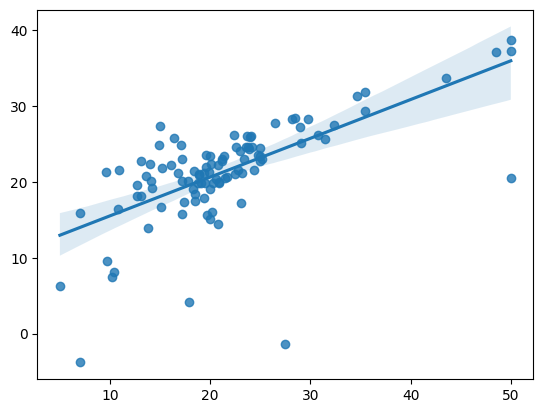

In [177]:
sns.regplot(x=y_test,y=y_pred)

<b>ASSIGNMENT 5</b>

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
